In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(87, 65)


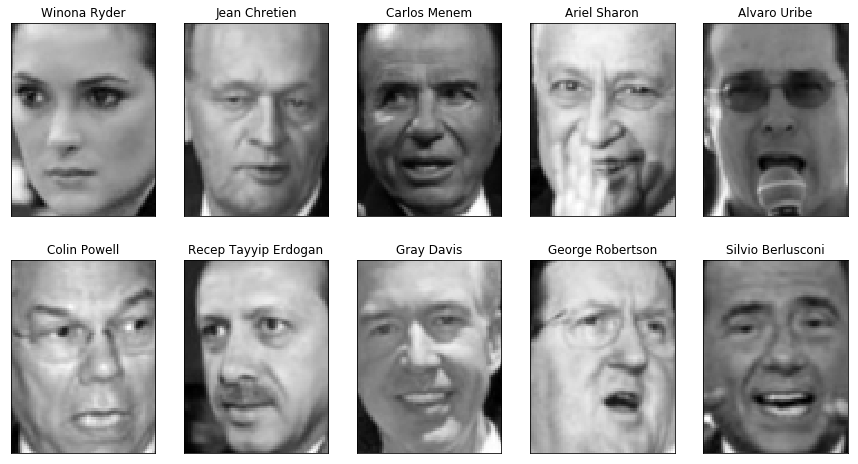

In [11]:
people = fetch_lfw_people(min_faces_per_person = 20, resize =0.7)
image_shape = people.images[0].shape
print(image_shape)

fig,axes = plt.subplots(2,5,figsize=(15,8), subplot_kw ={'xticks':(),'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap = cm.gray)
    ax.set_title(people.target_names[target])

In [12]:
print("people.images.shape:{}".format(people.images.shape))
print("Number of classes:{}".format(len(people.target_names)))

people.images.shape:(3023, 87, 65)
Number of classes:62


In [13]:
# count how of t e n each t a r g e t appea r s
counts = np.bincount(people.target)

# p r i n t coun t s nex t to t a r g e t names
for i,(count,name) in enumerate (zip(counts,people.target_names)):
    print("{0:25}{1:3}".format(name,count),end=' ')
    if((i+1)%3==0):
        print()

Alejandro Toledo          39 Alvaro Uribe              35 Amelie Mauresmo           21 
Andre Agassi              36 Angelina Jolie            20 Ariel Sharon              77 
Arnold Schwarzenegger     42 Atal Bihari Vajpayee      24 Bill Clinton              29 
Carlos Menem              21 Colin Powell             236 David Beckham             31 
Donald Rumsfeld          121 George Robertson          22 George W Bush            530 
Gerhard Schroeder        109 Gloria Macapagal Arroyo   44 Gray Davis                26 
Guillermo Coria           30 Hamid Karzai              22 Hans Blix                 39 
Hugo Chavez               71 Igor Ivanov               20 Jack Straw                28 
Jacques Chirac            52 Jean Chretien             55 Jennifer Aniston          21 
Jennifer Capriati         42 Jennifer Lopez            21 Jeremy Greenstock         24 
Jiang Zemin               20 John Ashcroft             53 John Negroponte           31 
Jose Maria Aznar          23 Jua

In [14]:
mask = np.zeros(people.target.shape,dtype=np.bool)
print(len(mask))
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1
    
X_people = people.data[mask]
y_people = people.target[mask]
#scale the greyscale values to be between 0 and 1 instead of 0 and 255 for better numeric stability
X_people = X_people/255
X_people.shape

3023


(2063, 5655)

In [15]:
X_train, X_test, y_train, y_test =train_test_split(X_people, y_people, stratify=y_people,random_state =0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1547, 5655)
(516, 5655)
(1547,)
(516,)


In [27]:

class Pca:
    
    def __init__(self,n_components,whiten=False):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.whiten = bool(whiten)
    
    def fit(self, X):
        self.mean = np.mean(X,axis=0)
        X =X-self.mean
        
        #if(self.whiten == True):
         #   X = self.whitening(X)
            
        cov = np.cov(X.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        eignevectors = eigenvectors.T
        #print(eigenvectors)
        index = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[index]
        eigenvectors = eigenvectors[index]
        
        self.components = eigenvectors[0:self.n_components]
    
    def transform(self,X):
        X = X-self.mean
        return np.dot(X, self.components.T)
    
    def whitening(self,X_centered):
        #X=X.reshape((-1,np.prod(X.shape[1:])))
        #X_centered = X-np.mean(X, axis=0)
        Sigma = np.dot(X_centered.T,X_centered)/X_centered.shape[0]
        W=None
        U,Lambda,_ =np.linalg.svd(Sigma)
        W=np.dot(np.diag(1.0/np.sqrt(Lambda+1e-5)),U.T)
        return np.dot(X_centered,W.T)

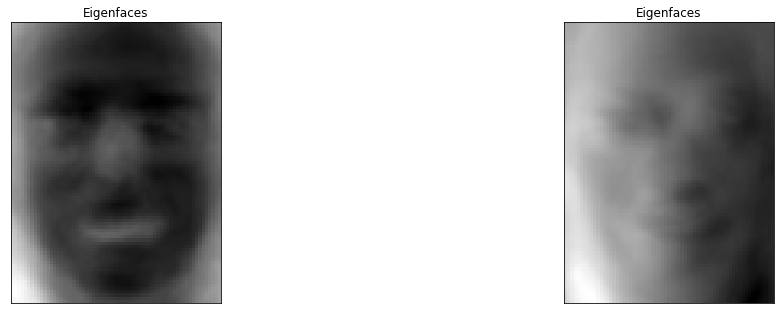

In [28]:
#check PCA
pca = Pca(2)
pca.fit(X_train)
X_project=pca.transform(X_train)
pca_p = PCA(2)
pca_p.fit(X_train)
X_proj = pca_p.fit_transform(X_train)
#print(X_proj.shape)

fig = plt.figure(figsize=(15,8)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 

c=1
for i in range(2): 
    ax = fig.add_subplot(2, 2, i+1, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(pca_p.components_[i,:], (87,65)), cmap=plt.cm.gray, interpolation='nearest')
    ax.set_title("Eigenfaces")
    c+=1

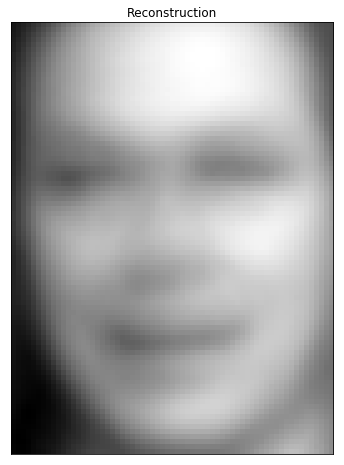

In [33]:
X_rec = pca_p.inverse_transform(X_proj) 

X_proj_img = np.reshape(X_rec,(1547, 87, 65)) 
fig = plt.figure(figsize=(6,6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 

for i in range(1): 
    ax = fig.add_subplot(1,1, i+1, xticks=[], yticks=[]) 
    ax.imshow(X_proj_img[i], cmap=plt.cm.gray, interpolation='nearest')
    ax.set_title("Reconstruction")

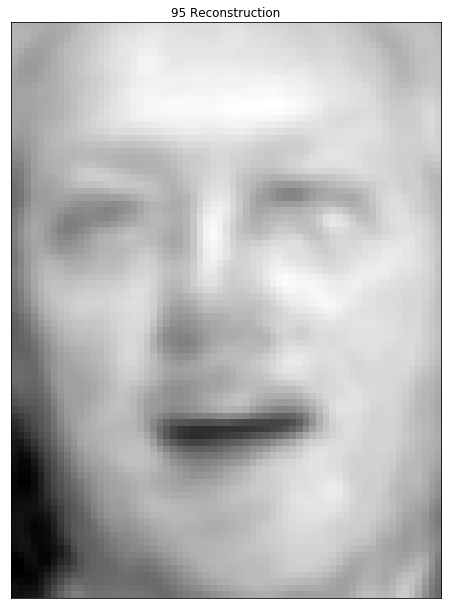

In [36]:
pca2 = PCA(180) 
pca2.fit(X_train)
X_kcomp = pca2.fit_transform(X_train)
X_rec2 = pca2.inverse_transform(X_kcomp)
X_proj_img = np.reshape(X_rec2,(1547, 87, 65))
fig = plt.figure(figsize=(15,8)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 

for i in range(1): 
    ax = fig.add_subplot(1,1, i+1, xticks=[], yticks=[]) 
    ax.imshow(X_proj_img[i], cmap=plt.cm.gray, interpolation='nearest')
    ax.set_title("95 Reconstruction")